In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../DataSets/Number'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

DataSets/Number\Number of Words in a Language.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load data into dataframe
#/kaggle/input/number-of-words-in-different-languages/Number of Words in a Language.csv
df= pd.read_csv("DataSets/Number/Number of Words in a Language.csv")
df.head()

,Language,Approx headwords,Approx definitions,Dictionary,Notes
0,Korean,1149538,NaN,우리말샘 Woori Mal Saem 2017,Online open dictionary including dialects Sou...
1,Tamil,1010008,NaN,Sorkuvai,online open dictionary run the Tamil Nadu go...
2,Portuguese,818000,NaN,Aulete Digital,Online dictionary including expressions
3,Finnish,800000,NaN,RedFox Pro,Online dictionary The free version has over 30...
4,Kurdish,744139,NaN,Authority Kurdish Language Dictionary Kurdish...,"contains 744,139 key words from few Kurdish ..."


In [4]:
df.columns

Index(['Language', 'Approx   headwords', 'Approx   definitions', 'Dictionary',
       'Notes'],
      dtype='object')

In [5]:
df.isnull().sum()

Language                  0
Approx   headwords        0
Approx   definitions    121
Dictionary                0
Notes                    11
dtype: int64

In [6]:
df["Approx   definitions"].unique()

array([     nan, 1402895.,  600000.,  382000.,  250000.,  207016.,
        172000.,  560000.])

In [7]:
df.columns = df.columns.str.replace("   ","_")
df.columns

Index(['Language', 'Approx_headwords', 'Approx_definitions', 'Dictionary',
       'Notes'],
      dtype='object')

In [8]:
df["Approx_definitions"]= df["Approx_definitions"].fillna("others")

Languages with most number of words

In [9]:
df = df.sort_values(by="Approx_headwords",ascending=False)
df.iloc[:10]

,Language,Approx_headwords,Approx_definitions,Dictionary,Notes
0,Korean,1149538,others,우리말샘 Woori Mal Saem 2017,Online open dictionary including dialects Sou...
1,Tamil,1010008,others,Sorkuvai,online open dictionary run the Tamil Nadu go...
2,Portuguese,818000,others,Aulete Digital,Online dictionary including expressions
3,Finnish,800000,others,RedFox Pro,Online dictionary The free version has over 30...
4,Kurdish,744139,others,Authority Kurdish Language Dictionary Kurdish...,"contains 744,139 key words from few Kurdish ..."
5,English,711378,1402895.0,English Wiktionary,"Contains 711,378 gloss entries and 1,402,895 t..."
6,Swedish,600000,others,Svenska Akademiens ordbok Swedish Academy,After having completed letters through SAOB ...
7,Korean,511282,others,Standard Korean Language Dictionary,"Contains 511,282 entries"
9,Japanese,500000,others,Nihon Kokugo Daijiten,NaN
10,Lithuanian,500000,others,Lietuvių kalbos žodynas Academic Dictionary L...,"22,000 pages volumes with quotations from al..."


<AxesSubplot:>

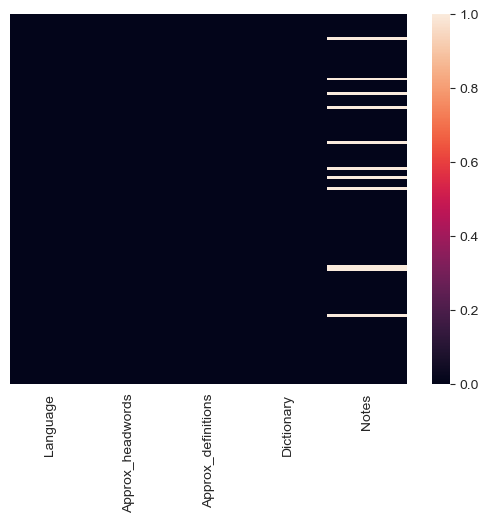

In [10]:
sns.heatmap(data=df.isnull(),yticklabels=False)

In [11]:
df['Notes'] = df['Notes'].fillna("No notes found")

<Figure size 13000x1000 with 0 Axes>

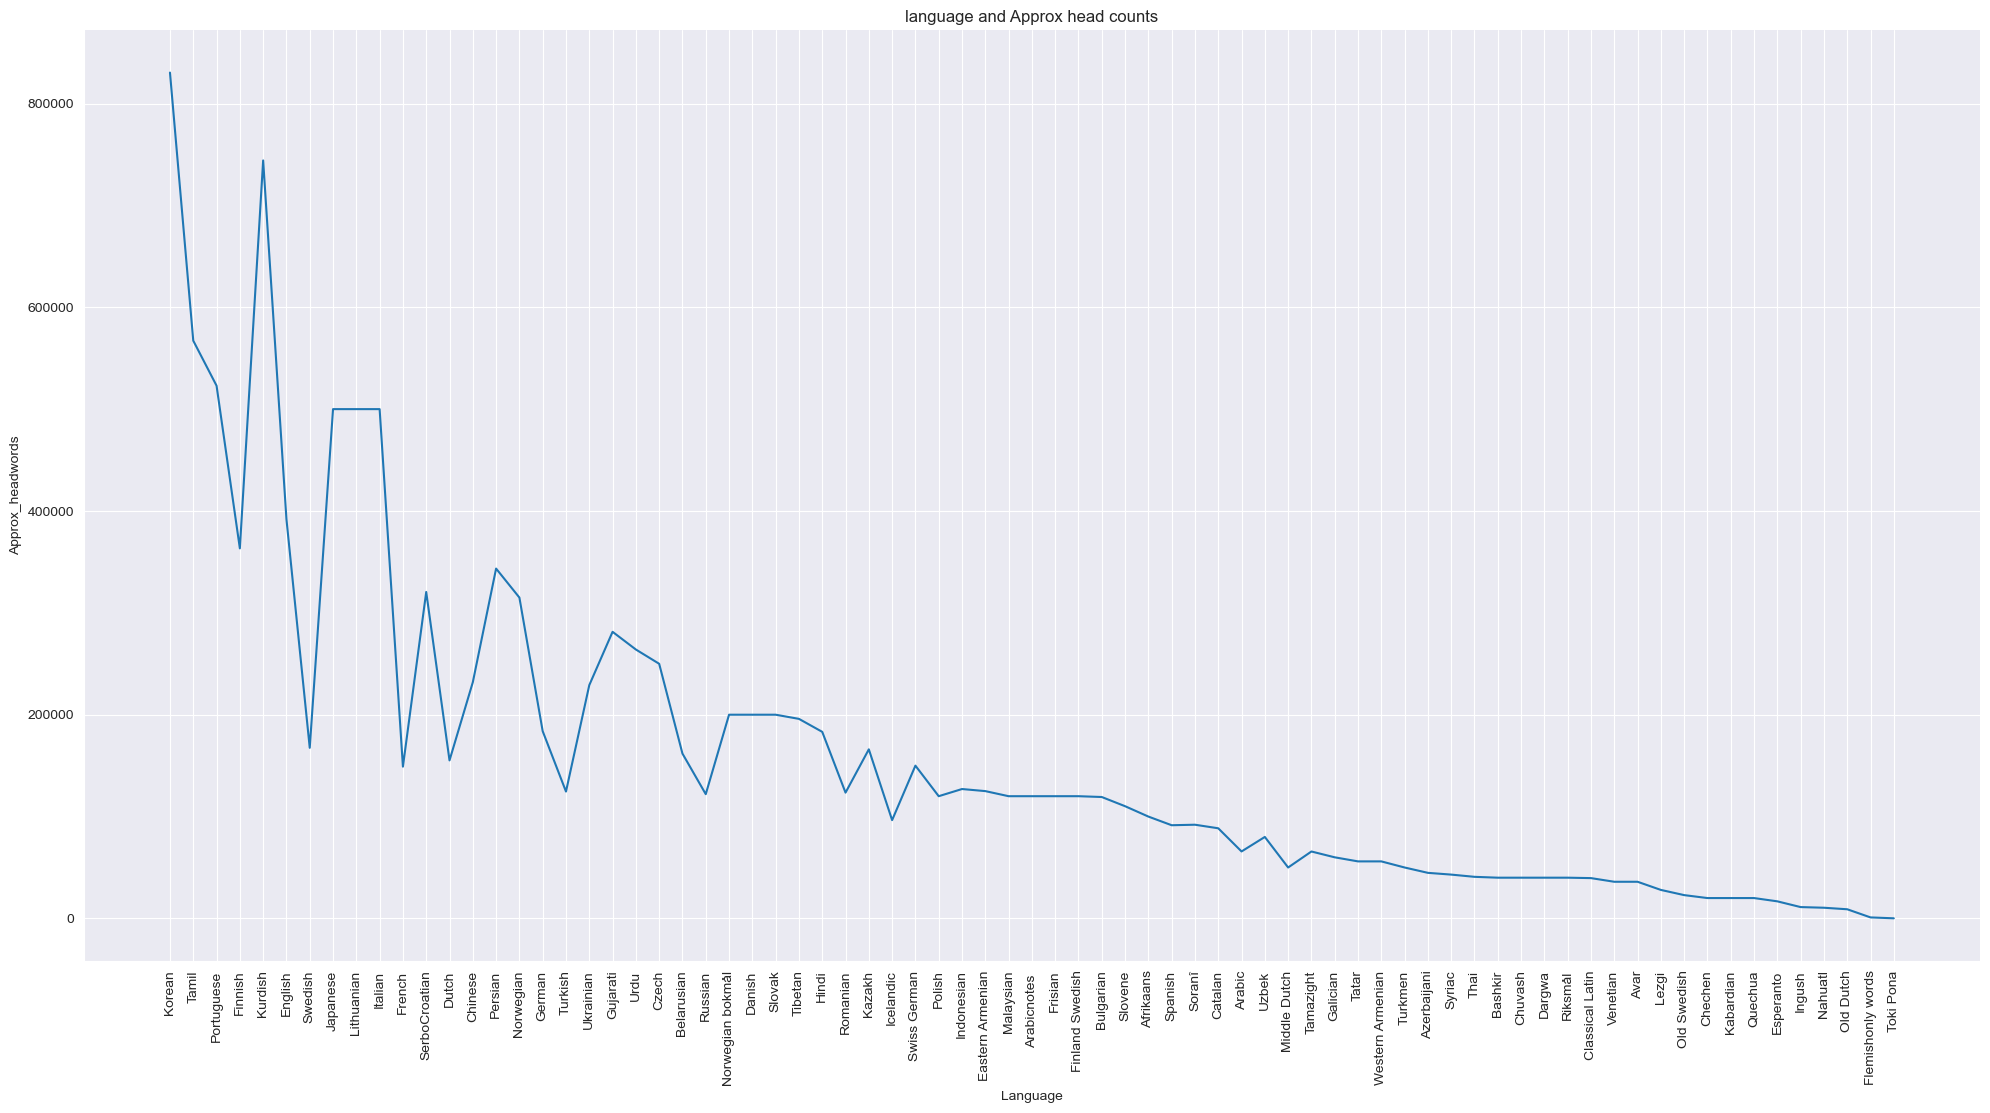

In [12]:
fig = plt.figure(figsize=(130,10))
sns.relplot(data=df,x="Language",y="Approx_headwords",ci=None,kind="line",height=10,aspect=2)
plt.xticks(rotation=90)
plt.title("language and Approx head counts")
plt.show()

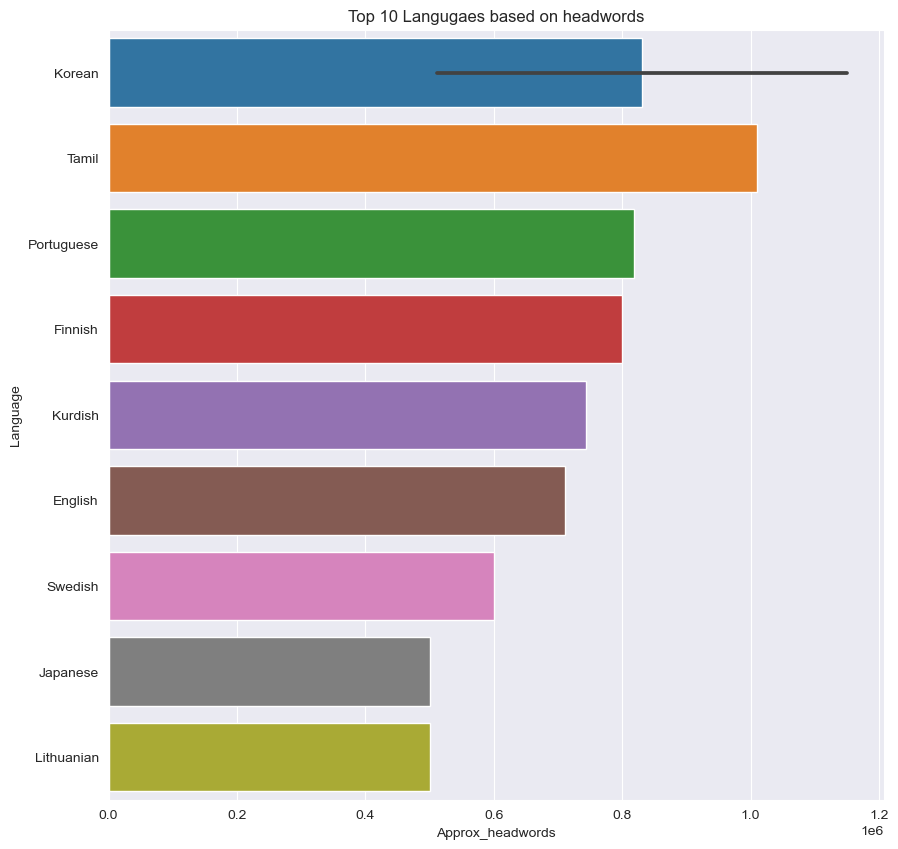

In [13]:
fig = plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
sns.barplot(data=df.iloc[:10],x="Approx_headwords",y="Language")
plt.title("Top 10 Langugaes based on headwords")
plt.show()

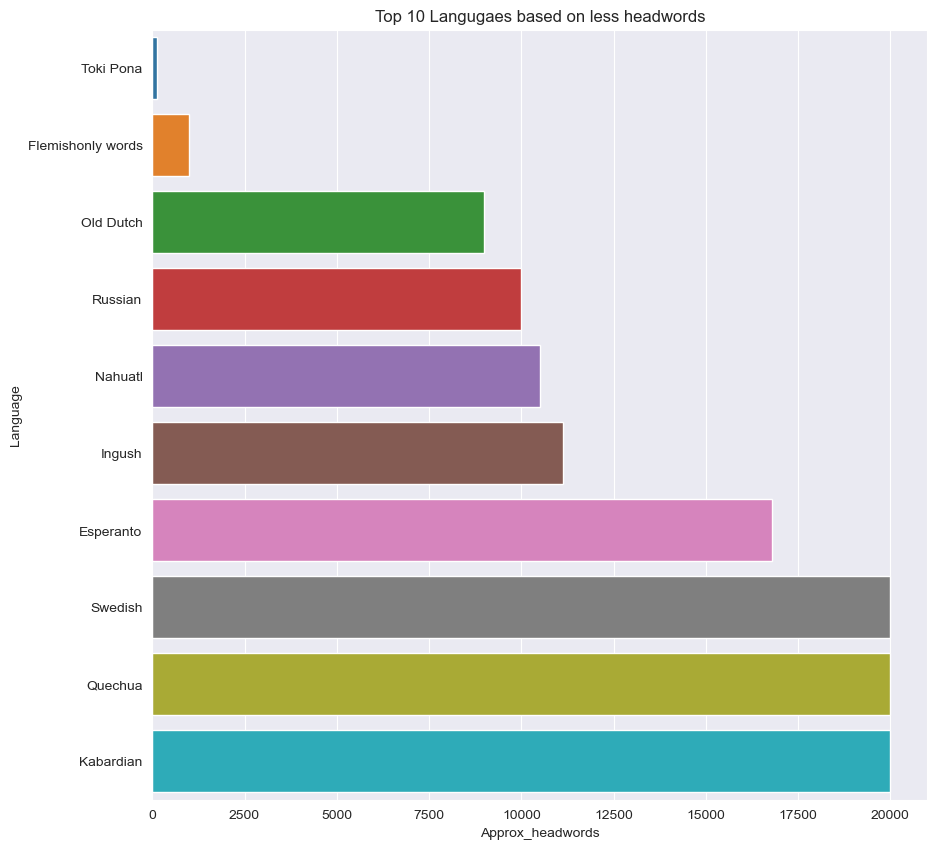

In [14]:
fig = plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
sns.barplot(data=df.sort_values(by="Approx_headwords",ascending=True).iloc[:10],x="Approx_headwords",y="Language")
plt.title("Top 10 Langugaes based on less headwords")
plt.show()